## Carga y preparación de los datos

In [1]:
import pandas as pd

file = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/contaminacionFinal.csv"
df = pd.read_csv(file)
print(f"{len(df)} filas cargadas")

df.rename(columns = {'6':'CO','7':'NO','8':'NO2','9':'PM2.5','10':'PM10','12':'NOx','14':'O3'}, inplace = True)
magnitudes = ['CO','NO','NO2','PM2.5','PM10','NOx','O3']

# la fecha como año mes dia y hora
import datetime, time
fechahoras = []
fechas=[]
for _,row in df.iterrows():
    fecha = str(int(row.DIA))+"/"+\
            str(int(row.MES))+"/"+\
            str(int(row.ANO))
    fechahora = fecha+"-"+str(int(row.HORA-1)) # para que sea de 0 a 23
    #print(fechahora)
    fechahoras.append(datetime.datetime.strptime(fechahora,"%d/%m/%Y-%H"))
    fechas.append(fecha)
df['fechaH'] = fechahoras
df['fecha'] = fechas
df['fecha'] = pd.to_datetime(df['fecha'])
df
    

24048 filas cargadas


,ANO,MES,DIA,HORA,CO,NO,NO2,PM2.5,PM10,NOx,O3,fechaH,fecha
0,2019,1,1,1,0.6,81,73,NaN,NaN,196,3.08,2019-01-01 00:00:00,2019-01-01
1,2019,1,1,2,0.8,124,82,NaN,NaN,272,3.05,2019-01-01 01:00:00,2019-01-01
2,2019,1,1,3,0.7,93,72,NaN,NaN,215,3.13,2019-01-01 02:00:00,2019-01-01
3,2019,1,1,4,0.6,86,66,NaN,NaN,198,3.02,2019-01-01 03:00:00,2019-01-01
4,2019,1,1,5,0.6,79,64,NaN,NaN,185,2.98,2019-01-01 04:00:00,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24043,2021,9,30,20,0.3,27,80,17.0,23.0,122,NaN,2021-09-30 19:00:00,2021-09-30
24044,2021,9,30,21,1.1,168,153,19.0,30.0,411,NaN,2021-09-30 20:00:00,2021-09-30
24045,2021,9,30,22,1.0,179,157,28.0,44.0,431,NaN,2021-09-30 21:00:00,2021-09-30
24046,2021,9,30,23,0.8,115,133,27.0,43.0,309,NaN,2021-09-30 22:00:00,2021-09-30


### Quitar 0s

En realidad los convertimos a NA. Primero mirammos la fecha de algún 0...

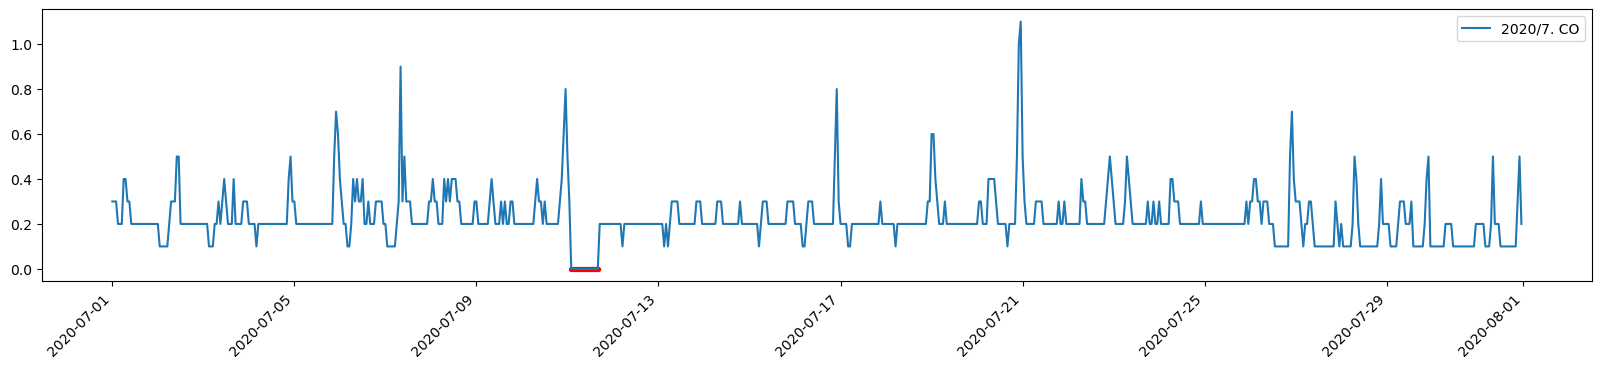

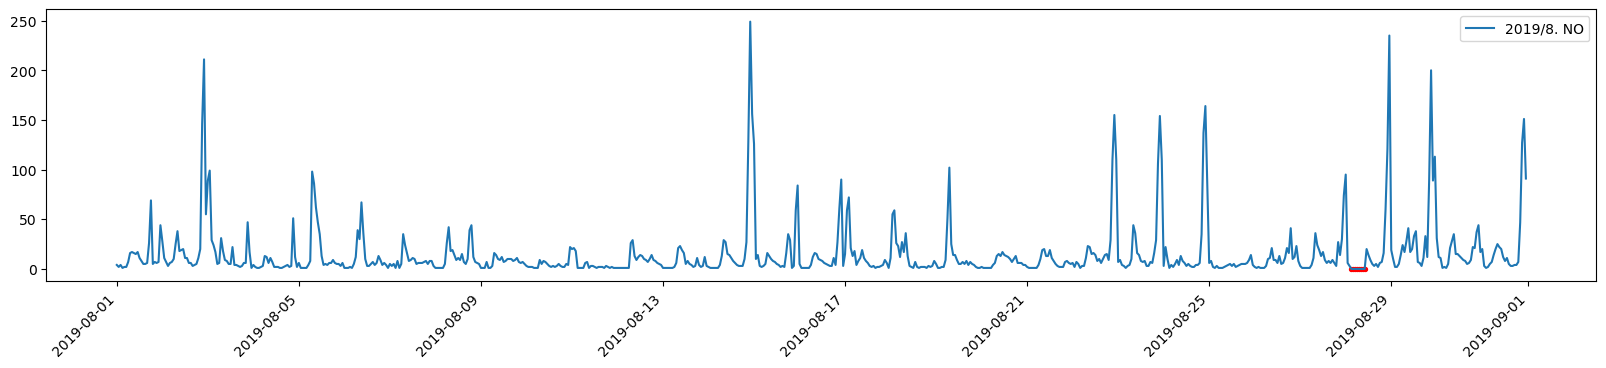

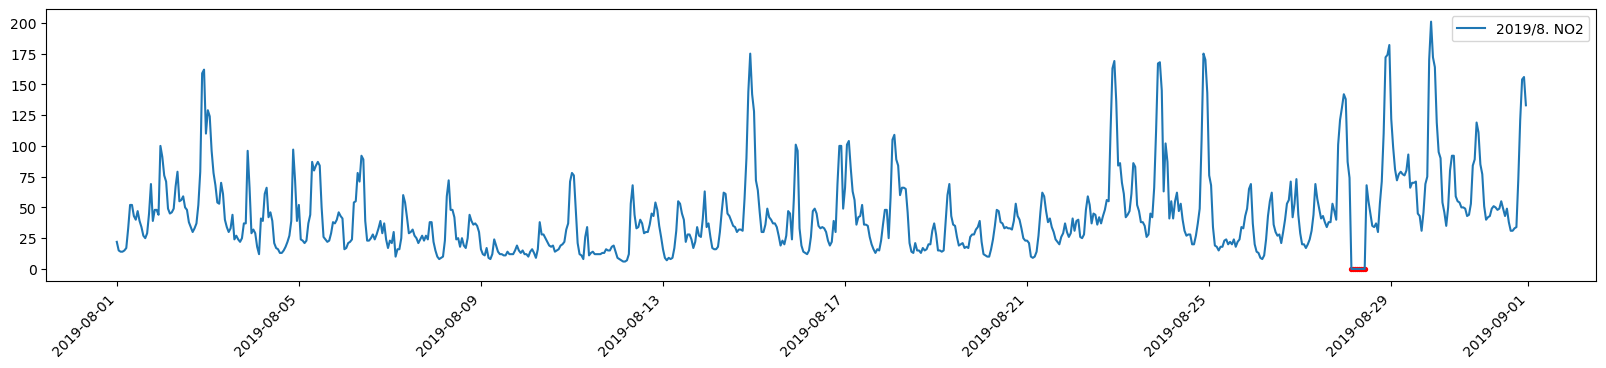

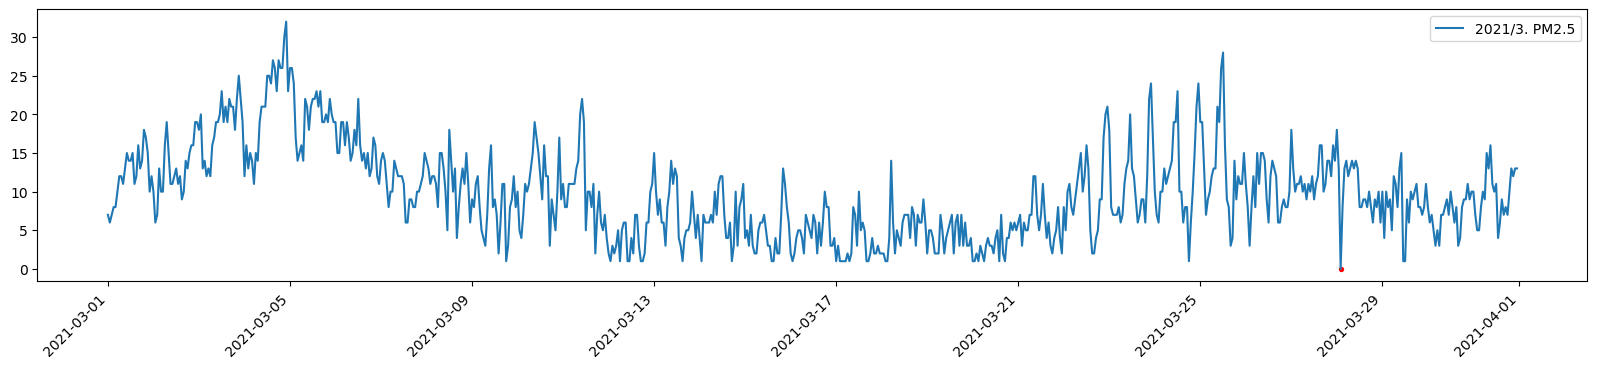

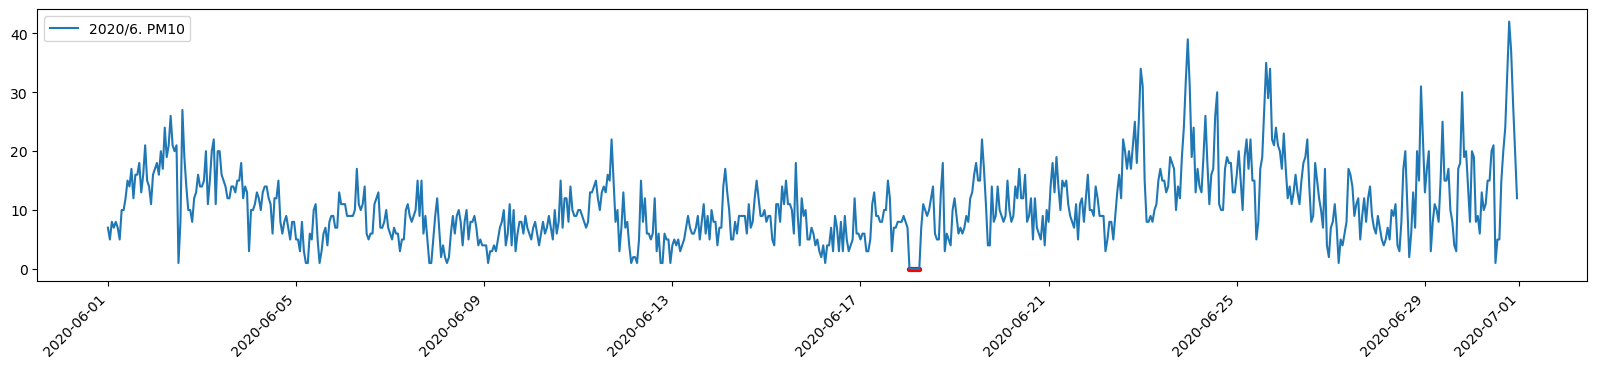

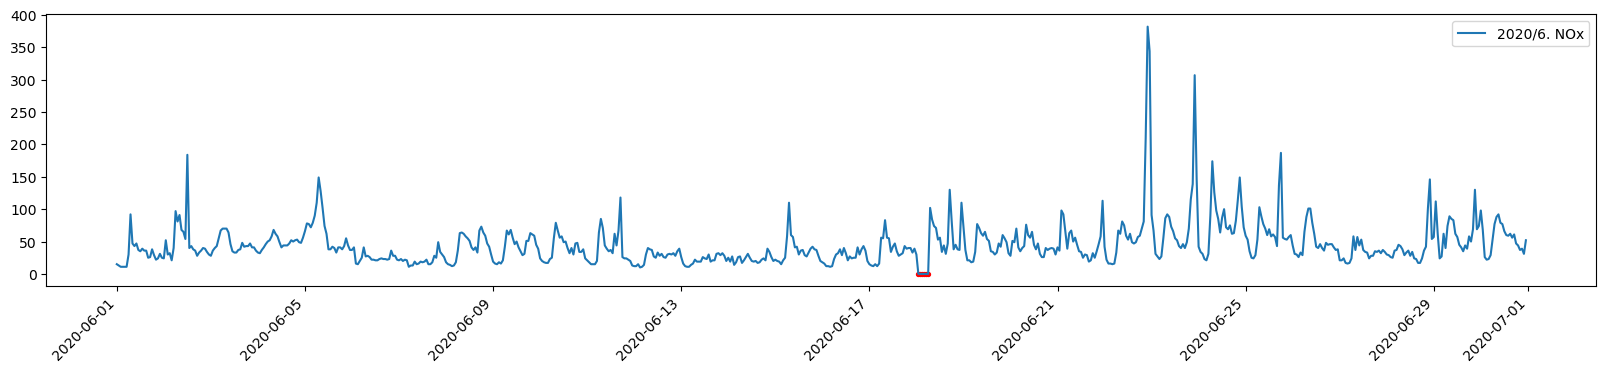

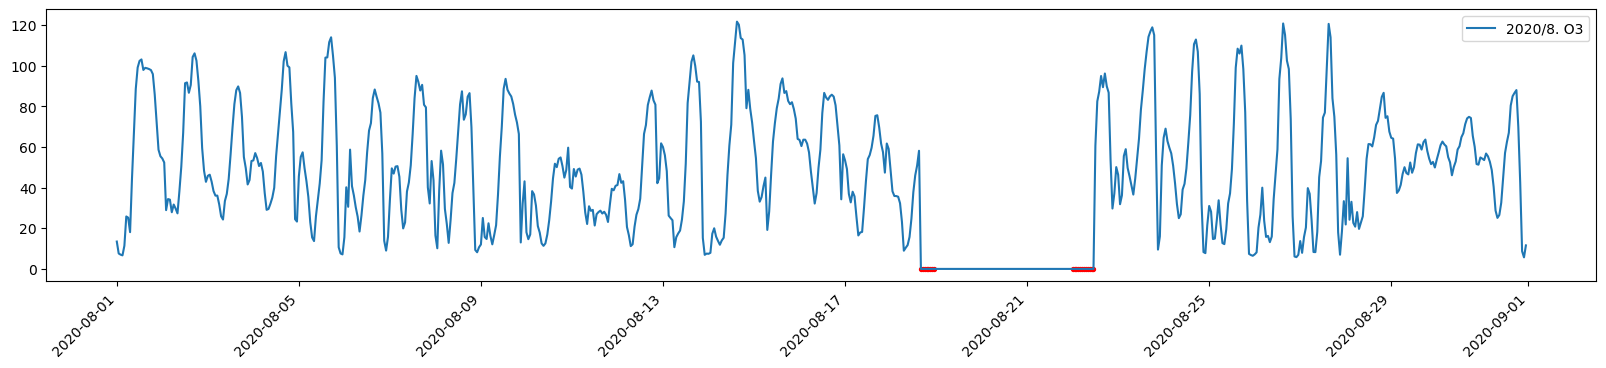

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import random

dfNoNa = df.dropna()
# muestra el mes al que pertenece la fila
def muestraMes(df,row,c):
    month = row.MES
    year = row.ANO
    dfmes = df[(df.MES==month) & (df.ANO==year)]
    fig, ax = plt.subplots(1,figsize=(20, 4),dpi=100)
    ax.plot(dfmes.fechaH,dfmes[c],label=str(int(year))+"/"+str(int(month))+". "+c)
    ceros = dfmes[dfmes[c]==0]
    ax.scatter(ceros.fechaH,ceros[c],color="red",s=8)
    if row[c]!=0: # señalar el día
        ax.scatter(row.fechaH,row[c],color="green",s=20)
    fig.autofmt_xdate(rotation=45)
    plt.legend()
    plt.show()
    
for c in magnitudes:
    dfc0 = dfNoNa[dfNoNa[c]==0]
    if len(dfc0)>0:
        row =dfc0.iloc[random.randint(0,len(dfc0)-1)]
        muestraMes(dfNoNa,row,c)

Decision: Convertir 0s a NA

In [3]:
# convertir 
for i,c in enumerate(magnitudes):
    df.iloc[(df[c]<=0).values,i] = pd.NA
df    

,ANO,MES,DIA,HORA,CO,NO,NO2,PM2.5,PM10,NOx,O3,fechaH,fecha
0,2019,1,1,1,0.6,81,73,NaN,NaN,196,3.08,2019-01-01 00:00:00,2019-01-01
1,2019,1,1,2,0.8,124,82,NaN,NaN,272,3.05,2019-01-01 01:00:00,2019-01-01
2,2019,1,1,3,0.7,93,72,NaN,NaN,215,3.13,2019-01-01 02:00:00,2019-01-01
3,2019,1,1,4,0.6,86,66,NaN,NaN,198,3.02,2019-01-01 03:00:00,2019-01-01
4,2019,1,1,5,0.6,79,64,NaN,NaN,185,2.98,2019-01-01 04:00:00,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24043,2021,9,30,20,0.3,27,80,17.0,23.0,122,NaN,2021-09-30 19:00:00,2021-09-30
24044,2021,9,30,21,1.1,168,153,19.0,30.0,411,NaN,2021-09-30 20:00:00,2021-09-30
24045,2021,9,30,22,1.0,179,157,28.0,44.0,431,NaN,2021-09-30 21:00:00,2021-09-30
24046,2021,9,30,23,0.8,115,133,27.0,43.0,309,NaN,2021-09-30 22:00:00,2021-09-30


# Histogramas con Boxplots

CO


C:\Users\Rafa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rafa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


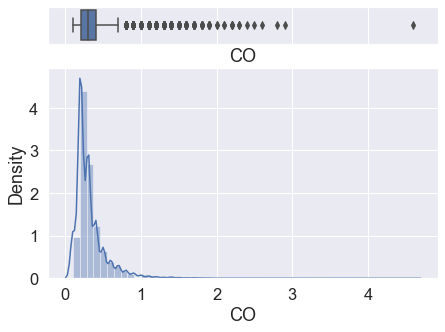

NO


C:\Users\Rafa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rafa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


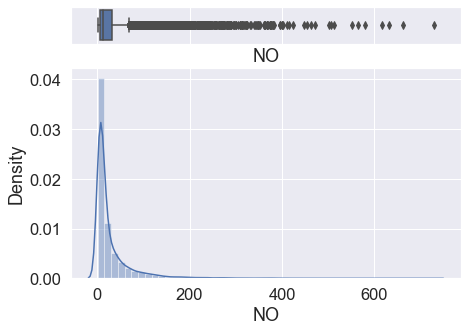

NO2


C:\Users\Rafa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rafa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


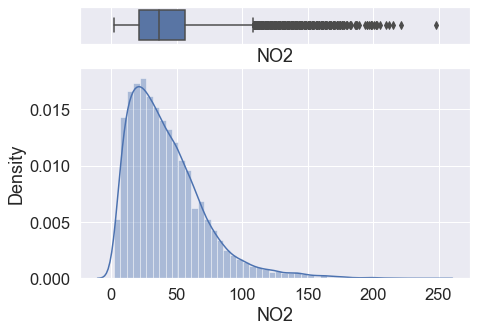

PM2.5


C:\Users\Rafa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rafa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


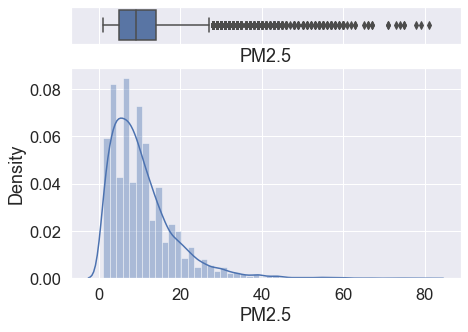

PM10


C:\Users\Rafa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rafa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


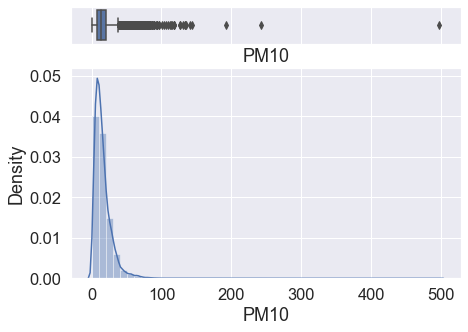

NOx


C:\Users\Rafa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rafa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


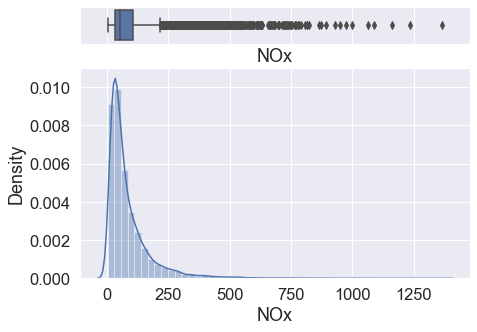

O3


C:\Users\Rafa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rafa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


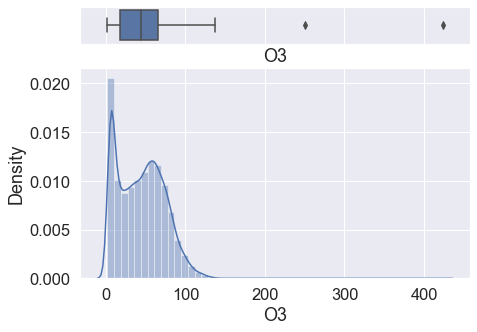

In [4]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


import seaborn as sns
def histogram_boxplot(data, xlabel = None, title = None, font_scale=1.5, figsize=(7,5), bins = None):
    """ Boxplot and histogram combined
    data: 1-d data array
    xlabel: xlabel 
    title: title
    font_scale: the scale of the font (default 2)
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)

    example use: histogram_boxplot(np.random.rand(100), bins = 20, title="Fancy plot")
    """

    sns.set(font_scale=font_scale)
    f2, (ax_box2, ax_hist2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=figsize)
    sns.boxplot(data, ax=ax_box2)
    sns.distplot(data, ax=ax_hist2, bins=bins) if bins else sns.distplot(data, ax=ax_hist2)
    if xlabel: ax_hist2.set(xlabel=xlabel)
    if title: ax_box2.set(title=title)
    plt.show()


def histogramas(df):
    dfNoNa = df.dropna()    
    for c in magnitudes:
        print(c)
        histogram_boxplot(dfNoNa[c],c)
histogramas(df)

# buscamos outliers


Lo mejor parece ser buscar la media de datos en dias similares

Los datos festivos de la comunidad de madrid incluyendo fiestas locales en la ciudad de Madrid:
    
https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=9f710c96da3f9510VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default

In [5]:
festivos = pd.read_csv("https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/calendario.csv",sep=",")
festivos.columns = ["fecha","semana","festivo","TIPO","FESTIVIDAD"]
# los huecos en festivo parecen ser todos días laborables
festivos["festivo"].fillna("laborable", inplace=True)
festivos.dropna(subset=["fecha","semana"],inplace=True)
festivos["fecha"] = pd.to_datetime(festivos['fecha'])
festivos["festivo"] = festivos["festivo"].str.lower()
festivoscols = festivos[["fecha","festivo"]]
# añadir la información de un dataframe al otro

# left join
df = df.merge(festivoscols, on='fecha', how='left')
df

,ANO,MES,DIA,HORA,CO,NO,NO2,PM2.5,PM10,NOx,O3,fechaH,fecha,festivo
0,2019,1,1,1,0.6,81,73,NaN,NaN,196,3.08,2019-01-01 00:00:00,2019-01-01,festivo
1,2019,1,1,2,0.8,124,82,NaN,NaN,272,3.05,2019-01-01 01:00:00,2019-01-01,festivo
2,2019,1,1,3,0.7,93,72,NaN,NaN,215,3.13,2019-01-01 02:00:00,2019-01-01,festivo
3,2019,1,1,4,0.6,86,66,NaN,NaN,198,3.02,2019-01-01 03:00:00,2019-01-01,festivo
4,2019,1,1,5,0.6,79,64,NaN,NaN,185,2.98,2019-01-01 04:00:00,2019-01-01,festivo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24043,2021,9,30,20,0.3,27,80,17.0,23.0,122,NaN,2021-09-30 19:00:00,2021-09-30,laborable
24044,2021,9,30,21,1.1,168,153,19.0,30.0,411,NaN,2021-09-30 20:00:00,2021-09-30,laborable
24045,2021,9,30,22,1.0,179,157,28.0,44.0,431,NaN,2021-09-30 21:00:00,2021-09-30,laborable
24046,2021,9,30,23,0.8,115,133,27.0,43.0,309,NaN,2021-09-30 22:00:00,2021-09-30,laborable


In [6]:
df.festivo.unique()

array(['festivo', 'laborable', 'sábado', 'domingo'], dtype=object)

CO
Tipo:  laborable mediana  1.9 mad  0.09999999999999998 3


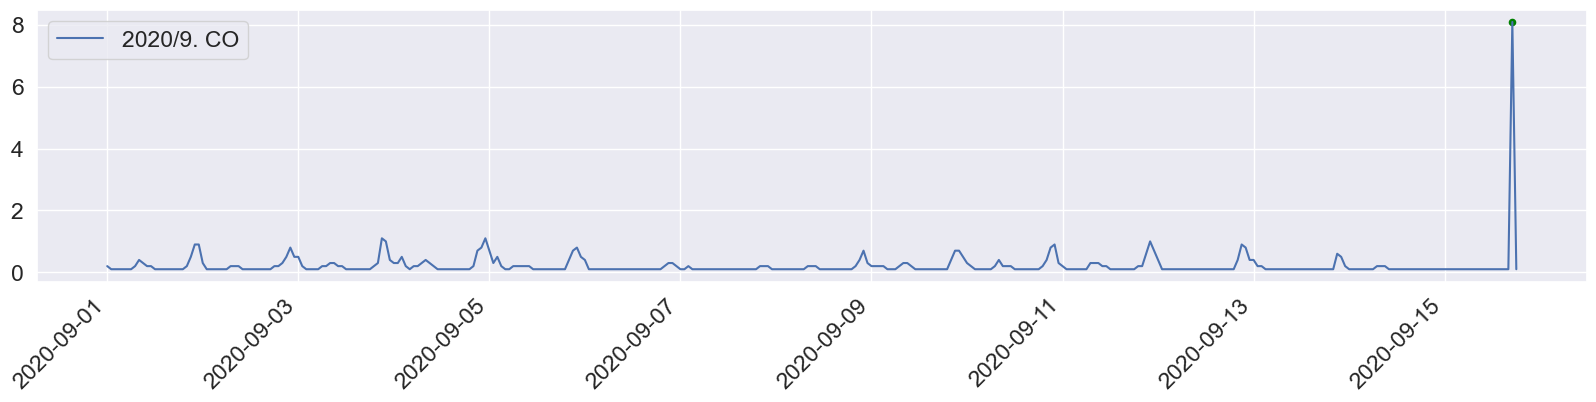

NO
Tipo:  laborable mediana  453.0 mad  9.0 11


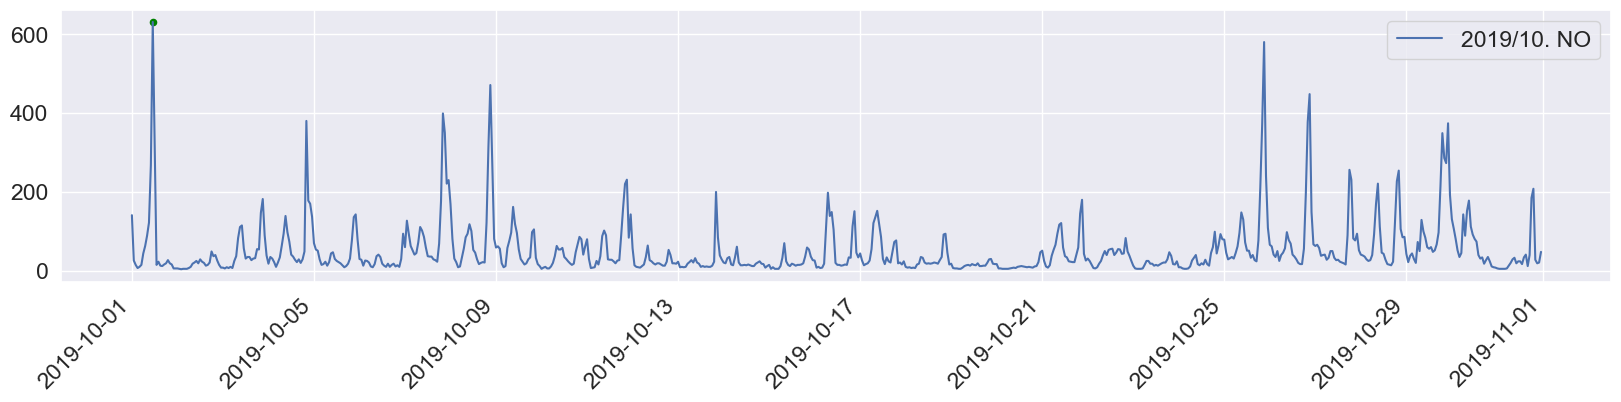

NO2
PM2.5
Tipo:  laborable mediana  56.0 mad  4.0 3


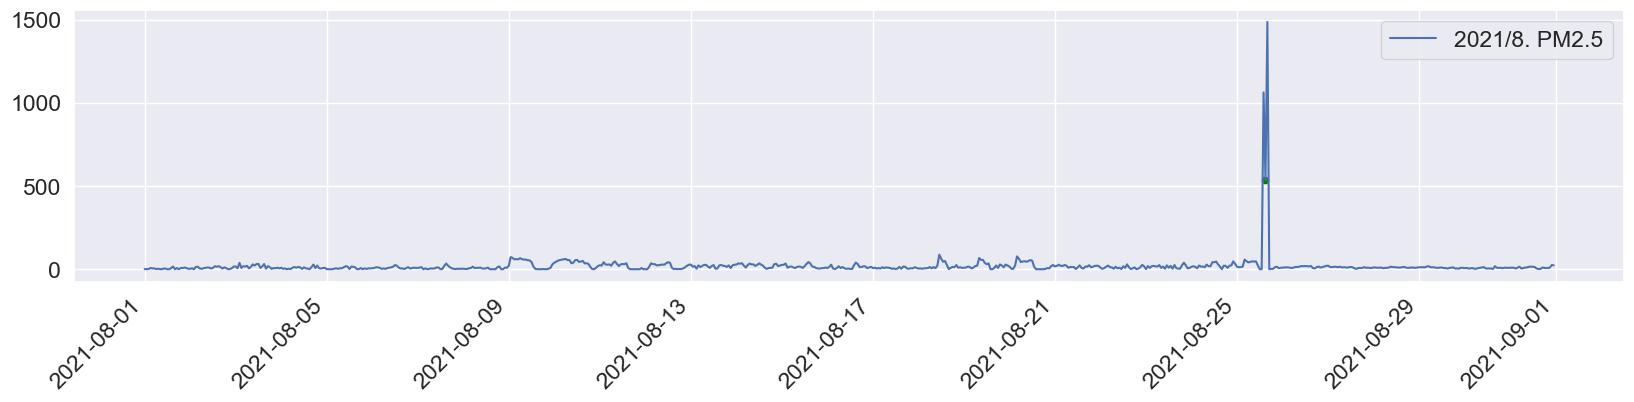

PM10
Tipo:  laborable mediana  84.0 mad  6.0 5


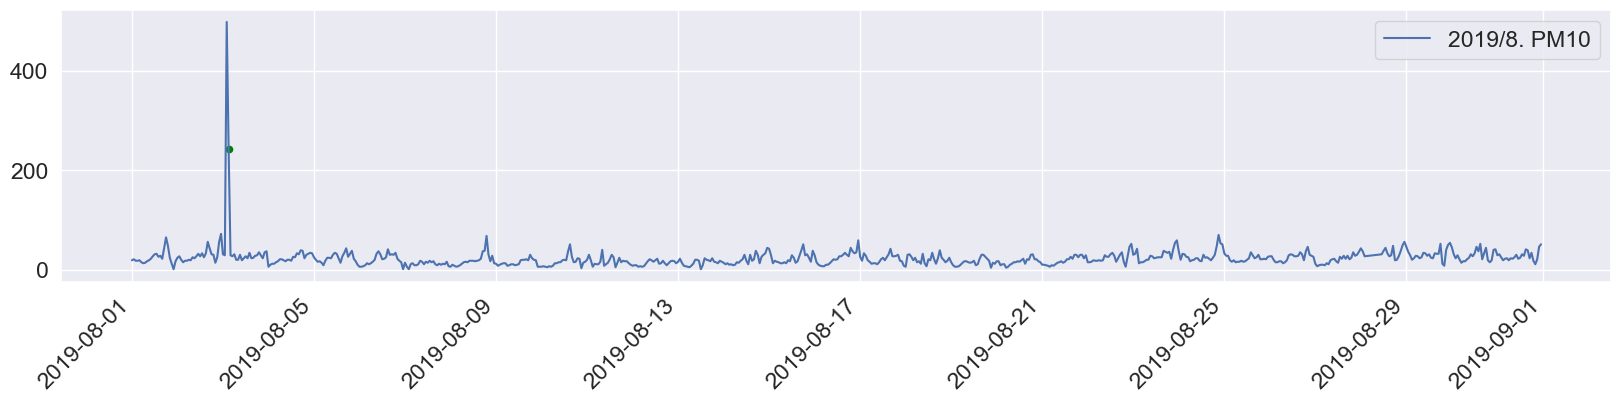

NOx
O3


In [7]:
from scipy import stats
# calculamos los máximos por día
dias = ['laborable', 'sábado', 'domingo']
for c in magnitudes:
    print(c)
    for tipo in dias:
        df_tipo = df[(df.festivo==tipo)].dropna(subset=[c])
        maxdiarios = df_tipo.groupby("DIA")[c].max()
        mediana = maxdiarios.median()
        mad =  stats.median_abs_deviation(df_tipo[c], scale=1)
        outliers = (df_tipo[c]-mediana)>15*mad
        df_out = df_tipo[outliers]
        if len(df_out)>0:
            print("Tipo: ",tipo,"mediana ",mediana,"mad ",mad,len(df_out))        
            row = df_out.iloc[random.randint(0,len(df_out)-1)]
            #print(row)
            muestraMes(df,row,c)
            df = df[~df.fechaH.isin(df_out.fechaH)]
        


CO


C:\Users\Rafa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rafa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


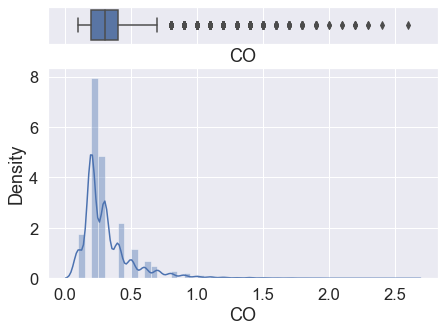

NO


C:\Users\Rafa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rafa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


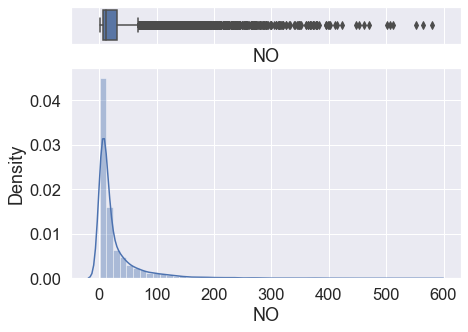

NO2


C:\Users\Rafa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rafa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


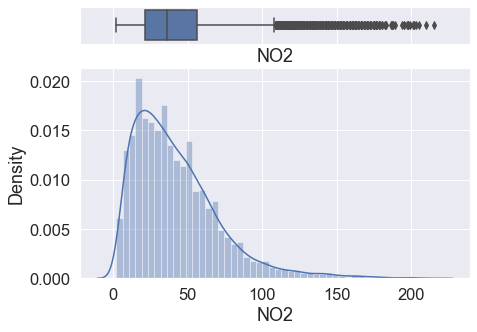

PM2.5


C:\Users\Rafa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rafa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


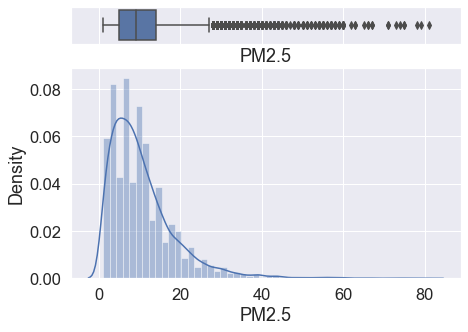

PM10


C:\Users\Rafa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rafa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


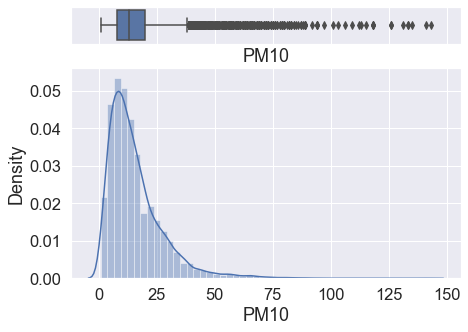

NOx


C:\Users\Rafa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rafa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


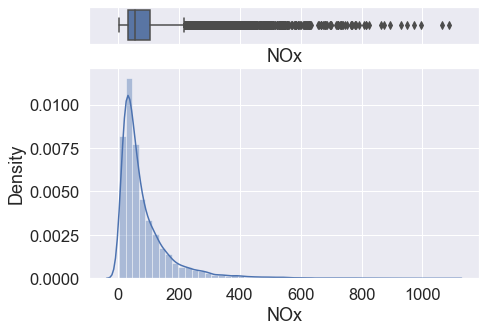

O3


C:\Users\Rafa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rafa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


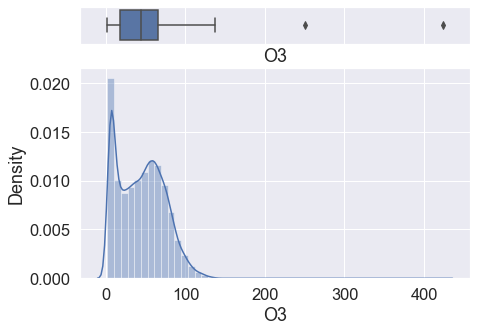

In [8]:
histogramas(df)

In [9]:
len(df)

24026